In [121]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### From a list of files, construct the list of tables, and store to variable `database_tables`

In [122]:
from src import transform 
from src import read_log_file as readlog
from src import compare_logs as compare
files = ["datasets/simulation_log"]
#files = ["datasets/cl_1.log","datasets/cl_3.log","datasets/cl_2.log", "datasets/cl_3.log"]
time_range_seconds = [30, 5000]
database_tables = compare.get_parsed_comparions_from_files(files, time_range_seconds)

### Seperate the stop the world and concurrent events for analysis.
### Use variables `stw_list` and `concurrent_list` 

In [123]:
stw_list, concurrent_list = compare.seperate_pauses_concurrent_lists(database_tables)
#stw_seperated_tables = transform.seperate_by_event_name(stw_table)
#concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


Text(0.5, 1.0, 'Concurrent durations during runtime in miliseconds')

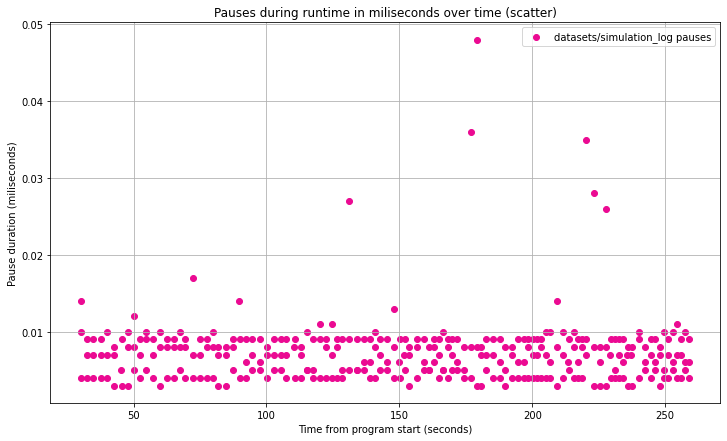

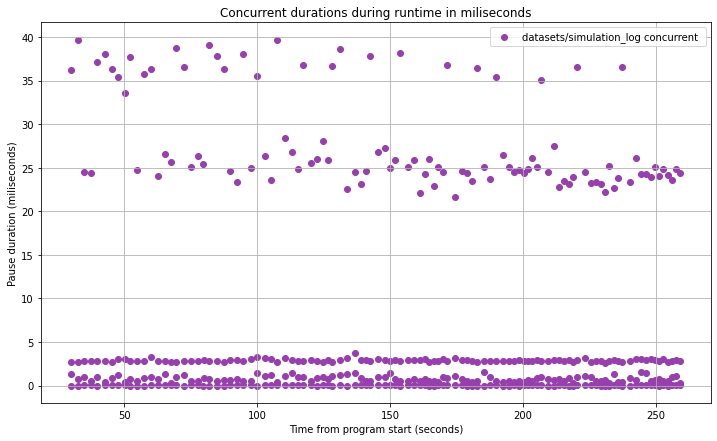

In [124]:
from src.graphing.scatterplot import comparrison_scatter
# Gather the list of timestamp information and event durations
stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_list)
labels = [file + " pauses" for file in files]
plot = comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)


# # Concurrent periods. Use the seperated events to see each type of concurrent duration
c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_list)
labels = [file + " concurrent " for file in files]
plot = comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)
plot.set_title("Concurrent durations during runtime in miliseconds")

### Time spent in Concurrent Phases vs. Stop The World phases

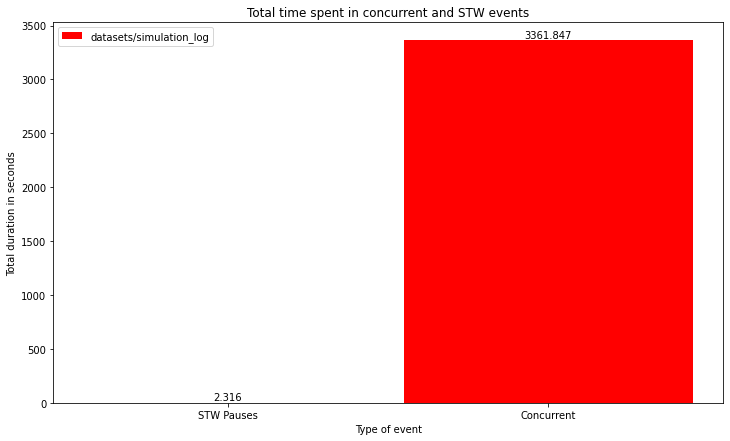

In [125]:
import matplotlib.pyplot as plt
ax = compare.compare_stw_concurrent_durations(database_tables, files)
ax.set_title("Total time spent in concurrent and STW events")
# _ = graph.compare_eventtypes_pie(database_table)
# ax = graph.compare_eventtypes_bar(database_table)
# ax.set_xticks(np.arange(2))


plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size


### Print trends about the events based on Event Type and Name

In [126]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)

from src.graphing.trends import compare_trends

labels = ["Pauses", "Concurrent"]
# We have two lists to deal with
# STW_listw
# Concurrent_list
linelength = 100
print("\t\t\t   =========== Comparing STW Pauses ===========")
print("-" * linelength)
_, durations_miliseconds_stw = compare.get_time_and_event_durations_from_lists(stw_list)
compare_trends(durations_miliseconds_stw, labels = files)
print("\n\n")



print("\t\t\t =========== Comparing Concurrent Pauses ===========")
print("-" * linelength)
_, durations_miliseconds_c = compare.get_time_and_event_durations_from_lists(concurrent_list)
compare_trends(durations_miliseconds_c, labels = files)

			   =========== Comparing STW Pauses ===========
----------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
datasets/simulation_log | 318          | 0.048        | 2.316        | 0.0073       | 0.0044       | 



			 =========== Comparing Concurrent Pauses ===========
----------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
datasets/simulation_log | 424          | 39.702       | 3361.847     | 7.9289       | 12.0073      | 


### Compare percentiles for pauses/concurrent phases, general and specific


In [127]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]
from src.graphing.percentiles import compare_pauses_percentiles

print("\t\t\t=========== Pause percentiles ===========\n")
compare_pauses_percentiles(durations_miliseconds_stw, labels = files)
print("\n\n\n")

print("\t\t\t=========== Concurrent Percentiles ===========\n")
compare_pauses_percentiles(durations_miliseconds_c, labels = files)

			=========== Pause percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
datasets/s | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.03 ms   | 0.04 ms   | 0.05 ms   | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
datasets/s | 2.08 ms   | 8.22 ms   | 25.94 ms  | 36.3 ms   | 38.54 ms  | 39.66 ms  | 39.7 ms   | 


### Average time in seconds per phase  / grouping

[-0.4, 0.0, 0.4, 0.6, 1.0, 1.4, 1.6, 2.0, 2.4]


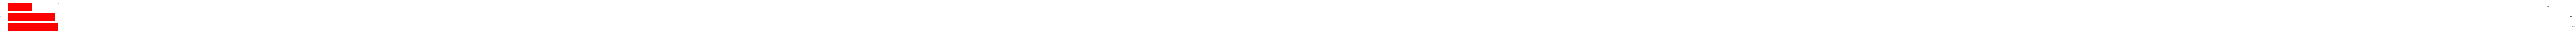

In [138]:

#I need to get the seperated table
from src.compare_logs import extract_events_by_name, compare_events_bar_chart
combined_2d_list = extract_events_by_name(stw_list)
compare_events_bar_chart(combined_2d_list, files)

In [129]:
### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

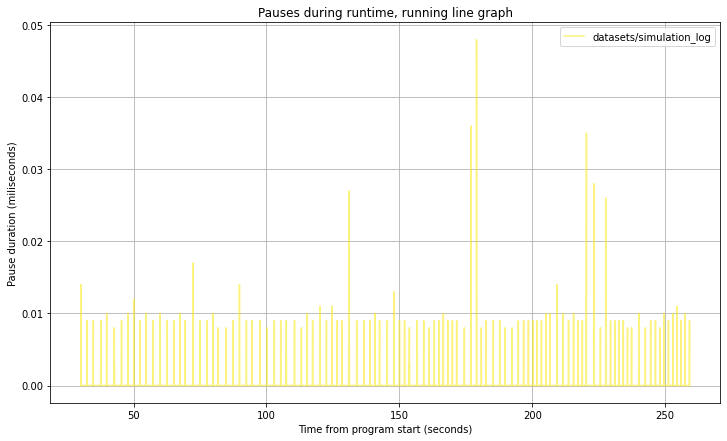

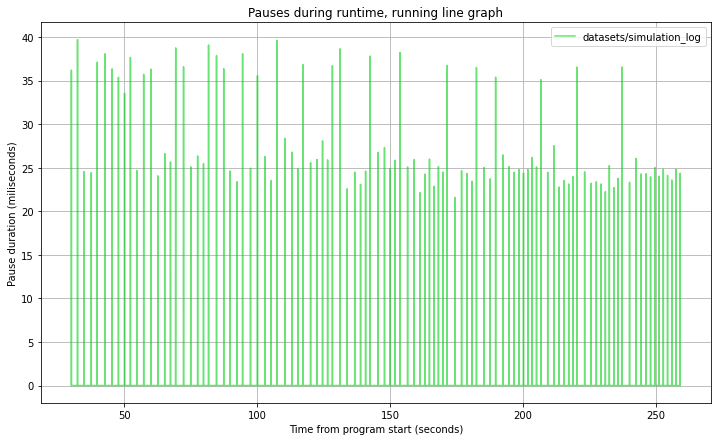

In [130]:
# Pauses during runtime
from src import graphing as graph
from src.graphing.linegraph import compare_paused_running_line
# Stop the world pauses
timestamps, pauses = compare.get_time_and_event_durations_from_lists(stw_list)
_ = compare_paused_running_line(timestamps, pauses, None, None, files, False)

timestamps, pauses = compare.get_time_and_event_durations_from_lists(concurrent_list)
_ = compare_paused_running_line(timestamps, pauses, None, None, files, False)

# # Concurrent periods
# labels = transform.get_event_table_labels(concurrent_seperated_tables)
# plot = graph.compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

In [131]:
### Allocation over time

(<AxesSubplot:title={'center':'Memory used BEFORE  gc'}, xlabel='Time in seconds during program runtime', ylabel='Heap space in Megabytes (MB)'>,
 <AxesSubplot:title={'center':'Memory used AFTER gc'}, xlabel='Time in seconds during program runtime', ylabel='Heap space in Megabytes (MB)'>)

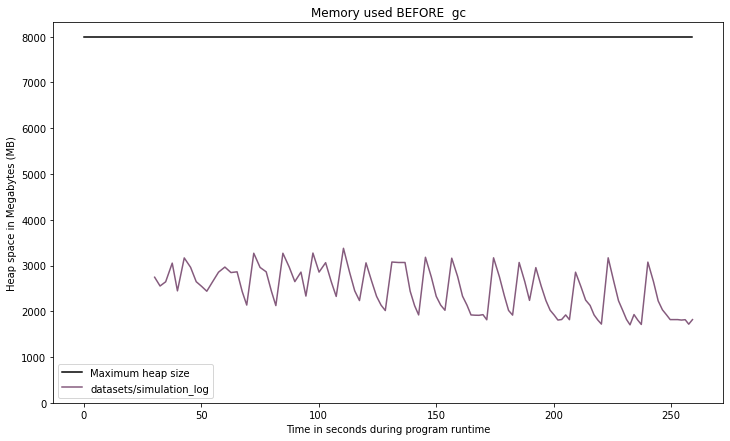

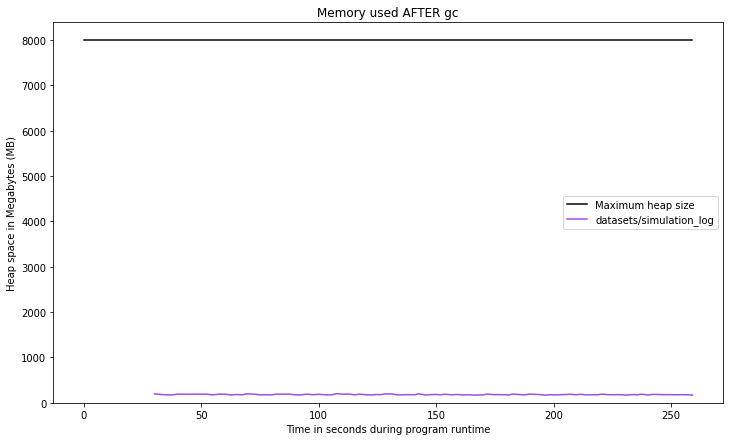

In [132]:

compare.compare_heap_occupancy(database_tables, 8, files)


In [133]:
### Reclaimed bytes


## RECLAIMED BYTES

Text(0, 0.5, 'MB reclaimed')

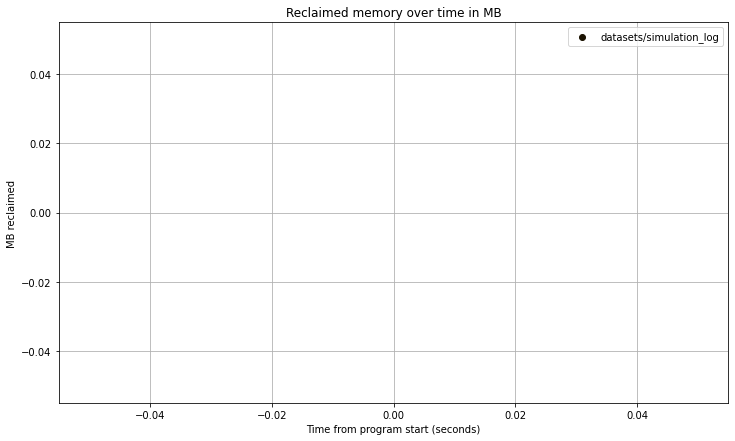

In [134]:
from src.graphing.scatterplot import plot_pauses_scatter
f, axs = plt.subplots()
labels = files
for idx in range(len(stw_list)):
    reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(stw_list[idx])
    axs = plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = labels[idx])

axs.set_title("Reclaimed memory over time in MB")
axs.set_ylabel("MB reclaimed")

### Frequencies of STW pauses (X ms buckets)

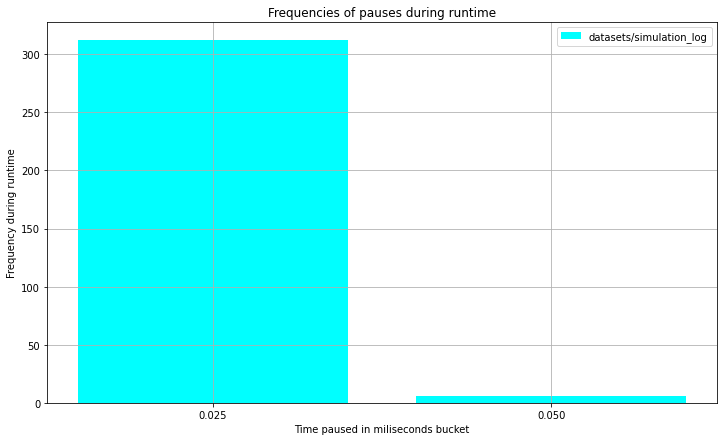

In [135]:
### Frequencies of STW pauses (X ms buckets)
from src.graphing.graph_bar_freq import compare_frequencies_bar
bucket_size_ms = 0.025
buckets = []
for i in range(len(stw_list)):
    bucket = transform.group_into_pause_buckets(stw_list[i], bucket_size_ms)
    buckets.append(bucket)

compare_frequencies_bar(buckets, bucket_size_ms, files)
